Sales Data Analysis – Customer & Product Insights


- Exploratory Data Analysis (Python):
    - Total sales & profit by product category and region
    - Identify top customers by revenue
    - Monthly sales trends and seasonality

- Visualization (Python):
    - Bar charts for top products
    - Line charts for sales trends
    - Heatmaps for regional sales distribution

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
df = pd.read_csv("cleaned_superstore.csv")

In [ ]:
# Parse dates
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

# EDA: Sales & Profit by Category and Region
category_region = df.groupby(["Category", "Region"])[["Sales", "Profit"]].sum().reset_index()

# Top Customers by Sales
top_customers = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(10)


# Monthly Sales Trends
df["Month"] = df["Order Date"].dt.to_period("M")
monthly_trends = df.groupby("Month")["Sales"].sum()

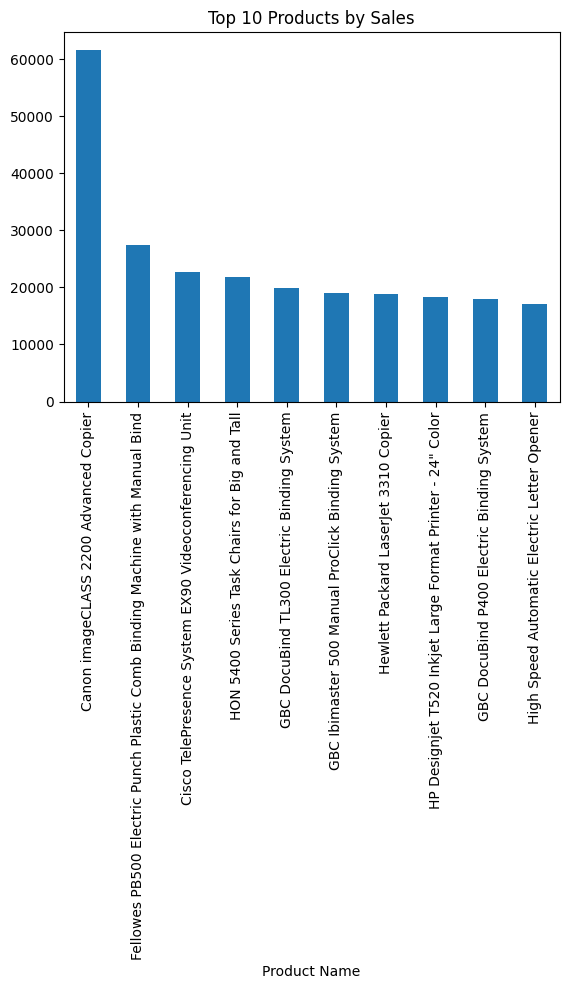

In [ ]:
# Visualization: Bar chart for top products
top_products = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top 10 Products by Sales')
plt.show()

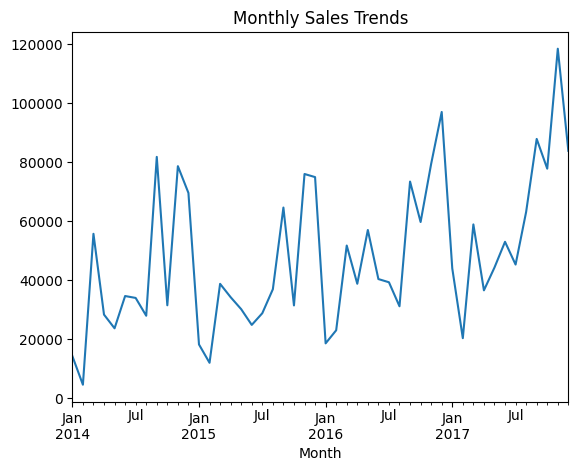

In [ ]:
# Line chart for sales trend
monthly_trends.plot(title='Monthly Sales Trends')
plt.show()


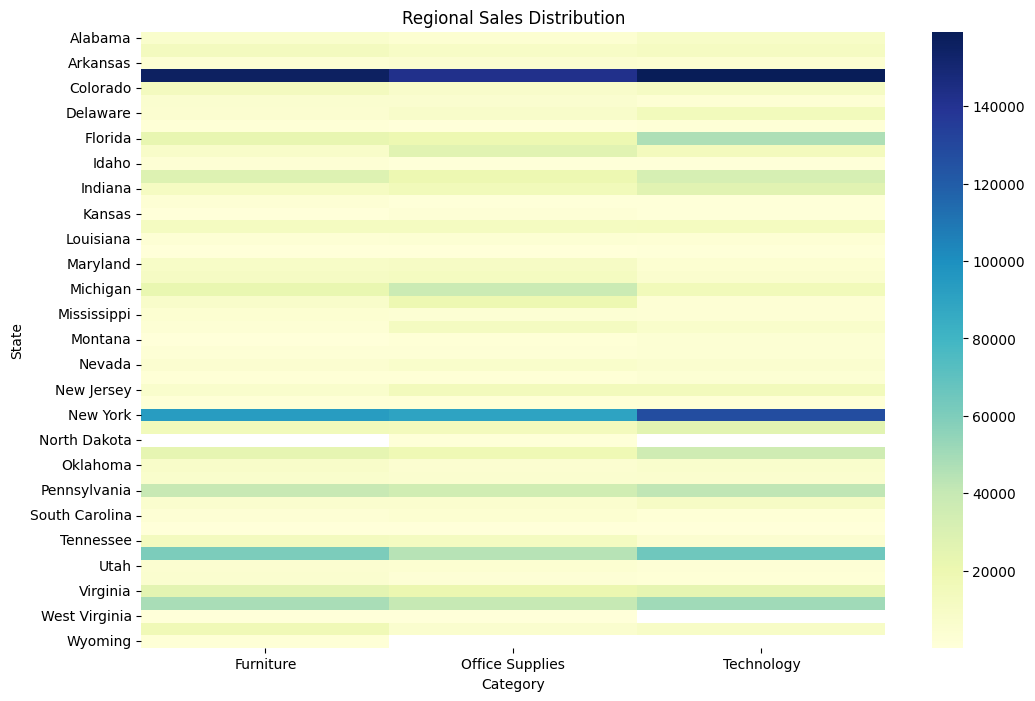

In [ ]:
# Heatmap for regional sales distribution
pivot = df.pivot_table(values='Sales', index='State', columns='Category', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=False, cmap='YlGnBu')
plt.title("Regional Sales Distribution")
plt.show()


In [ ]:
# Output Summary Stats
category_region, top_customers.head(), monthly_trends.head()

(           Category   Region        Sales      Profit
 0         Furniture  Central  163797.1638  -2871.0494
 1         Furniture     East  208291.2040   3046.1658
 2         Furniture    South  117298.6840   6771.2061
 3         Furniture     West  252612.7435  11504.9503
 4   Office Supplies  Central  167026.4150   8879.9799
 5   Office Supplies     East  205516.0550  41014.5791
 6   Office Supplies    South  125651.3130  19986.3928
 7   Office Supplies     West  220853.2490  52609.8490
 8        Technology  Central  170416.3120  33697.4320
 9        Technology     East  264973.9810  47462.0351
 10       Technology    South  148771.9080  19991.8314
 11       Technology     West  251991.8320  44303.6496,
 Customer Name
 Sean Miller      25043.050
 Tamara Chand     19052.218
 Raymond Buch     15117.339
 Tom Ashbrook     14595.620
 Adrian Barton    14473.571
 Name: Sales, dtype: float64,
 Month
 2014-01    14236.895
 2014-02     4519.892
 2014-03    55691.009
 2014-04    28295.345
 201